In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os 
os.environ['OMP_NUM_THREADS'] =  '1'

In [3]:

dataset = pd.read_csv('F:/dataset/gt_2015.csv')


In [4]:
dataset.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [5]:
dataset

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515
...,...,...,...,...,...,...,...,...,...,...,...
7379,3.62680,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
7380,4.16740,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
7381,5.48200,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
7382,5.88370,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738


In [6]:
dataset.shape

(7384, 11)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


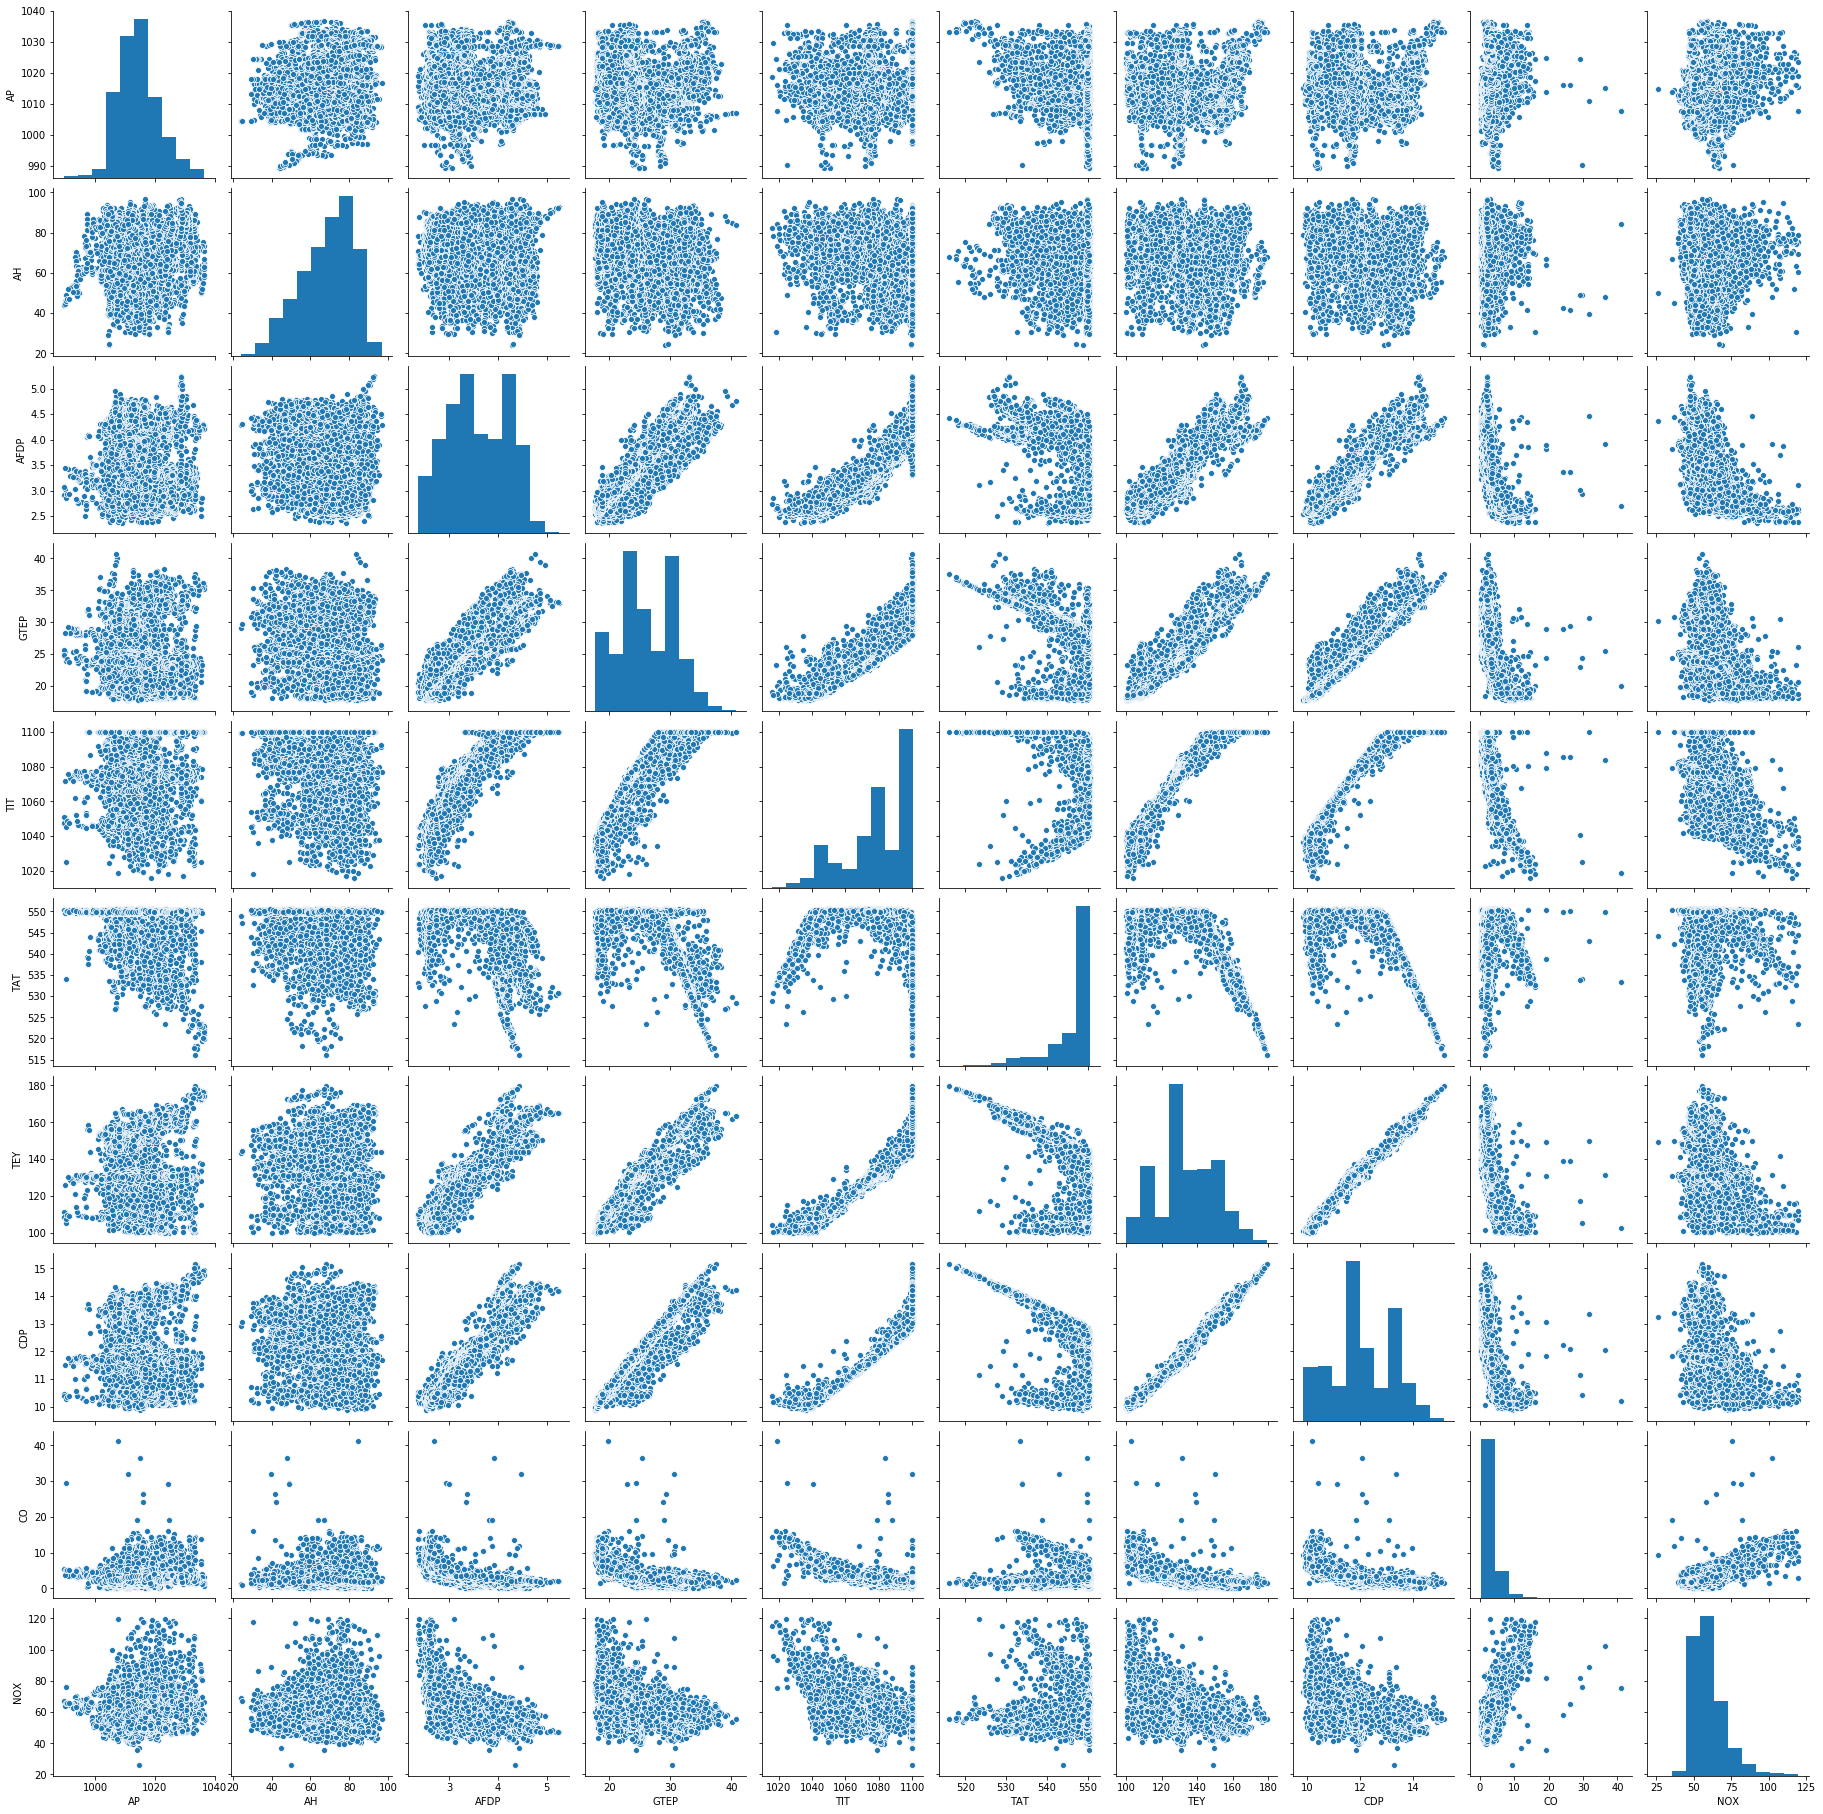

In [8]:
sns.pairplot(dataset.iloc[:,1:11])

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = dataset.iloc[:,[9,10]]
x=sc.fit_transform(x)

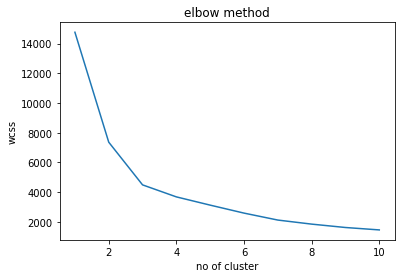

In [10]:
#elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 2)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('elbow method')
plt.xlabel('no of cluster')
plt.ylabel('wcss')
plt.show()

In [11]:
#fitting to kmeans
kmeans= KMeans(n_clusters = 3, init = 'k-means++', random_state = 2)
y_means = kmeans.fit_predict(x)

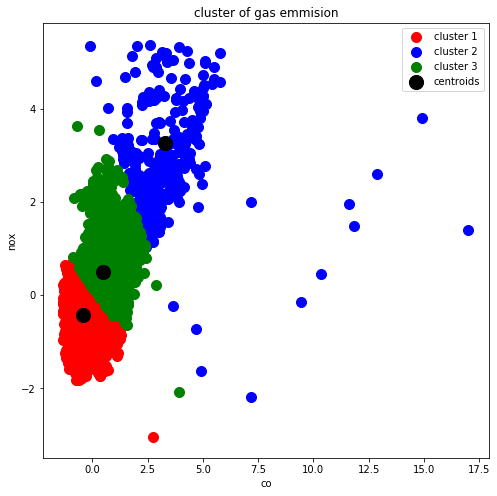

In [12]:
#visualising the cluster
plt.figure(figsize=(8,8))
plt.scatter(x[y_means==0,0], x[y_means==0,1], s = 100, c= 'red' ,label = 'cluster 1')
plt.scatter(x[y_means==1,0], x[y_means==1,1], s = 100, c= 'blue' ,label = 'cluster 2')
plt.scatter(x[y_means==2,0], x[y_means==2,1], s = 100, c= 'green' ,label = 'cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s = 200, c = 'black', label = 'centroids')
plt.title('cluster of gas emmision')
plt.xlabel('co')
plt.ylabel('nox')
plt.legend()
plt.show()

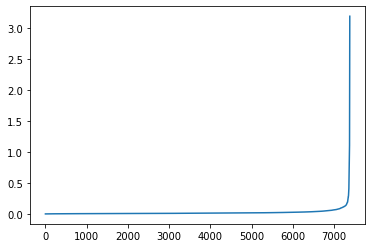

In [13]:
#dbscan
from sklearn.neighbors import NearestNeighbors

neighbours = NearestNeighbors(n_neighbors = 2)
distances, indices = neighbours.fit(x).kneighbors(x)
distances  = distances[:,1]
distances = np.sort(distances, axis = 0)
plt.plot(distances)

In [14]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.3 , min_samples= 3)
y_dbscan = dbscan.fit_predict(x)

In [15]:
y_dbscan

array([-1, -1,  0, ...,  0,  0,  0], dtype=int64)

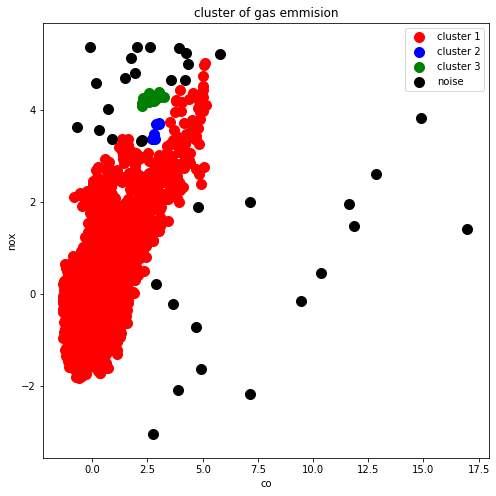

In [16]:
#visualising the cluster
plt.figure(figsize=(8,8))
plt.scatter(x[y_dbscan==0,0], x[y_dbscan==0,1], s = 100, c= 'red' ,label = 'cluster 1')
plt.scatter(x[y_dbscan==1,0], x[y_dbscan==1,1], s = 100, c= 'blue' ,label = 'cluster 2')
plt.scatter(x[y_dbscan==2,0], x[y_dbscan==2,1], s = 100, c= 'green' ,label = 'cluster 3')

plt.scatter(x[y_dbscan==-1,0], x[y_dbscan==-1,1], s = 100, c= 'black' ,label = 'noise')

plt.title('cluster of gas emmision')
plt.xlabel('co')
plt.ylabel('nox')
plt.legend()
plt.show()